# Import Libraries


In [24]:
import pandas as pd
import numpy as np
import shutil
import matplotlib.pyplot as plt
import os
import random
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
sourcePath = "../../data/interim/archive/images/"
print("Below listed the Classes of cats:  \n")

folders = []
totalImages = 0
for folder in os.listdir(sourcePath):
    print(f"{folder} has over {len(os.listdir(sourcePath + folder))} images")
    totalImages += len(os.listdir(sourcePath + folder))
    folders.append(folder)


print(f"There are currently: {len(folders)} class available in the dataset.\n")
print(f"Total Image from the datasets: {totalImages} images" )

Below listed the Classes of cats:  

apple_pie has over 1000 images
baby_back_ribs has over 1000 images
baklava has over 1000 images
beef_carpaccio has over 1000 images
beef_tartare has over 1000 images
beet_salad has over 1000 images
beignets has over 1000 images
bibimbap has over 1000 images
bread_pudding has over 1000 images
breakfast_burrito has over 1000 images
bruschetta has over 1000 images
caesar_salad has over 1000 images
cannoli has over 1000 images
caprese_salad has over 1000 images
carrot_cake has over 1000 images
ceviche has over 1000 images
cheesecake has over 1000 images
cheese_plate has over 1000 images
chicken_curry has over 1000 images
chicken_quesadilla has over 1000 images
chicken_wings has over 1000 images
chocolate_cake has over 1000 images
chocolate_mousse has over 1000 images
churros has over 1000 images
clam_chowder has over 1000 images
club_sandwich has over 1000 images
crab_cakes has over 1000 images
creme_brulee has over 1000 images
croque_madame has over 10

In [3]:
data_dir = "../../data/interim/archive/images/"

# Data Collection

In [4]:
def train_val_generators(DATA_DIR):
    datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
    train_generator = datagen.flow_from_directory(directory=DATA_DIR,
                                                  batch_size=15,
                                                  class_mode='categorical',
                                                  target_size=(300,300),
                                                  subset = 'training'
                                                 )
    
    validation_generator = datagen.flow_from_directory(directory=DATA_DIR,subset='validation',
                                                                  batch_size=15,
                                                                 class_mode='categorical',
                                                                 target_size=(300, 300))
    
    return train_generator, validation_generator

In [5]:
train_generator, validation_generator = train_val_generators(data_dir)

Found 80800 images belonging to 101 classes.
Found 20200 images belonging to 101 classes.


# Collect the datasets class distribution labels into csv

In [6]:
labels_list = [label for label, index in train_generator.class_indices.items()]
labels_index = [index for label, index in train_generator.class_indices.items()]


In [7]:
labels_list[:5], labels_index[:5]

(['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare'],
 [0, 1, 2, 3, 4])

In [8]:
df = pd.DataFrame({'Food Name': labels_list, 'Numerical Labels': labels_index})

In [9]:
df.head()

Food Name  Numerical Labels
0       apple_pie                 0
1  baby_back_ribs                 1
2         baklava                 2
3  beef_carpaccio                 3
4    beef_tartare                 4

In [10]:
csv_dir = "../../data/processed/foods_labels.csv"

In [11]:
# df.to_csv(csv_dir)

# Visualize images from dataset

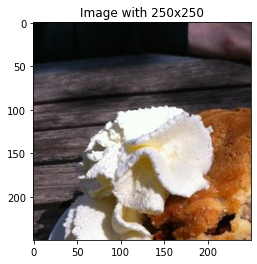

In [12]:
class_name = 'apple_pie'

t = random.sample(os.listdir(f'{data_dir}{class_name}/'), 3)[0]
ta=plt.imread(f'{data_dir}{class_name}/103801.jpg')
plt.title("Image with 250x250")
plt.imshow(ta[:250, :250])



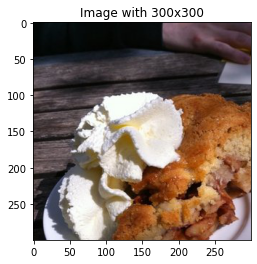

In [13]:
class_name = 'apple_pie'

t = random.sample(os.listdir(f'{data_dir}{class_name}/'), 3)[0]
ta=plt.imread(f'{data_dir}{class_name}/103801.jpg')
plt.title("Image with 300x300")
plt.imshow(ta[:300, :300])



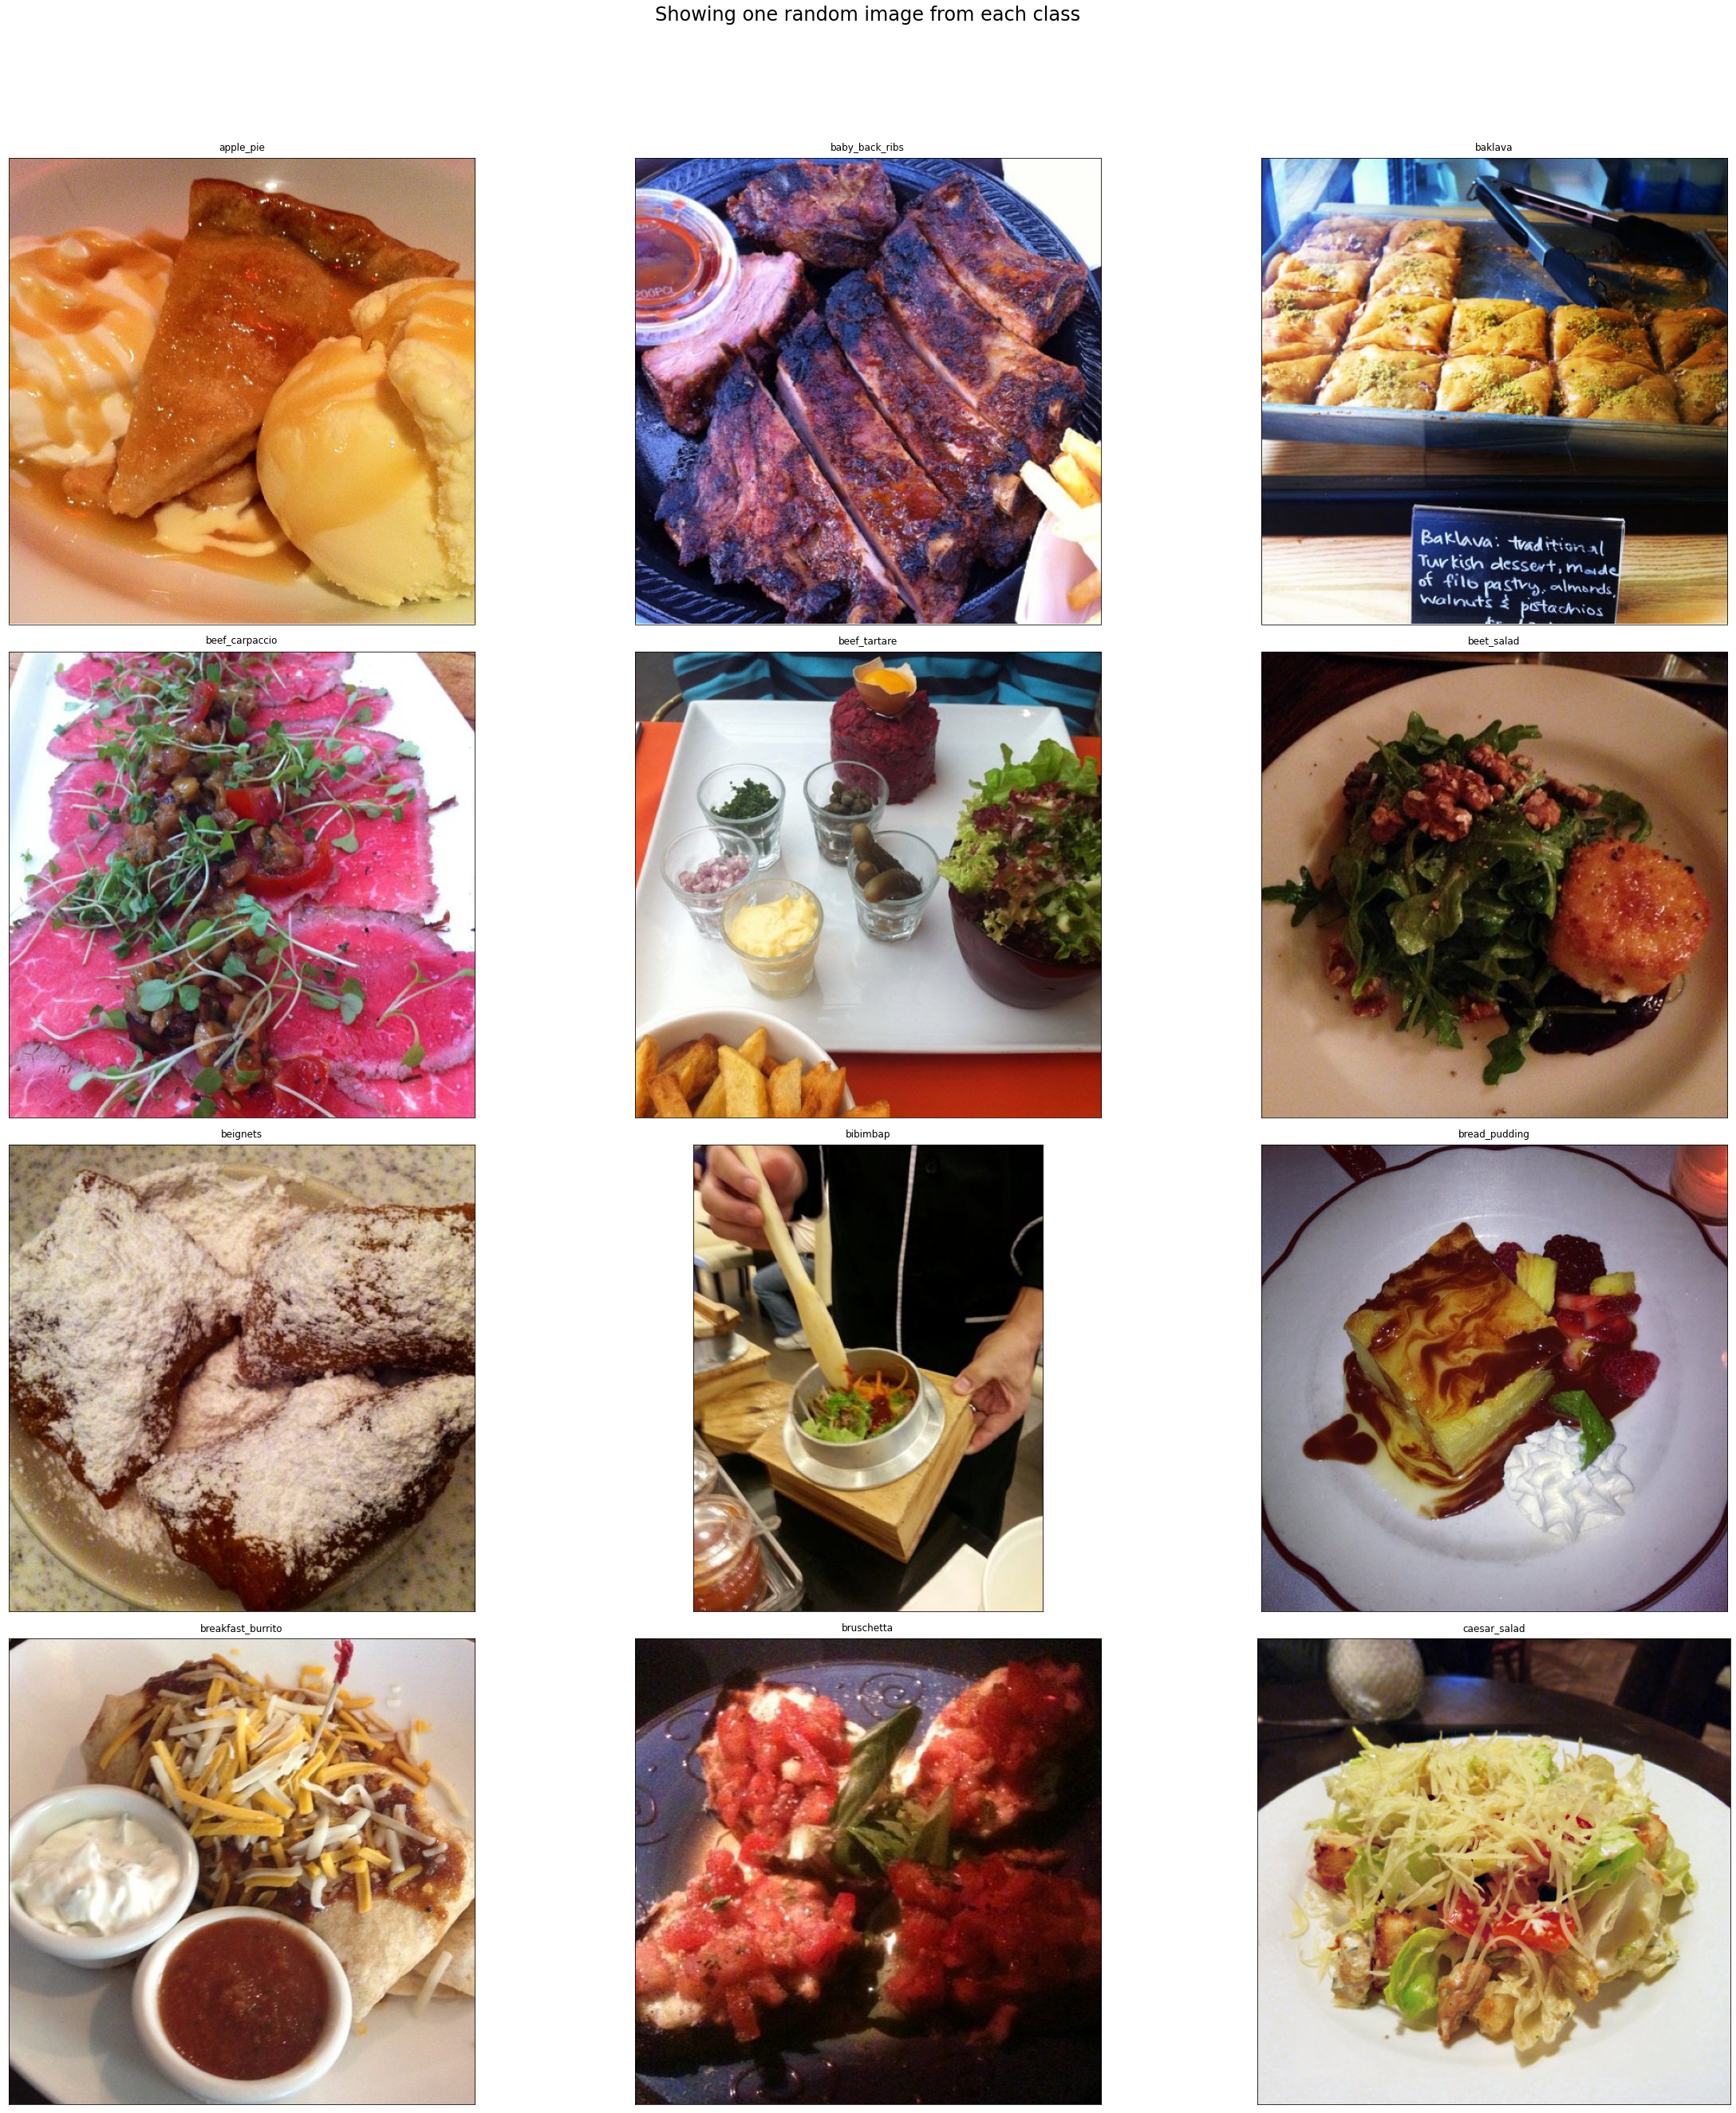

In [16]:
# Visualize the data, showing one image per class from 101 classes
rows = 4
cols = 3
fig, ax = plt.subplots(rows, cols, figsize=(35,35))
fig.suptitle("Showing one random image from each class", y=1.05, fontsize=24) # Adding  y=1.05, fontsize=24 helped me fix the suptitle overlapping with axes issue

foods_sorted = sorted(os.listdir(data_dir))
food_id = 0
for i in range(rows):
    for j in range(cols):
        try:
            food_selected = foods_sorted[food_id] 
            food_id += 1
        except:
            break
        if food_selected == '.DS_Store':
            continue
        food_selected_images = os.listdir(os.path.join(data_dir,food_selected)) # returns the list of all files present in each food category
        food_selected_random = np.random.choice(food_selected_images) # picks one food item from the list as choice, takes a list and returns one random item
        img = plt.imread(os.path.join(data_dir,food_selected, food_selected_random))
        ax[i][j].imshow(img)
        ax[i][j].set_title(food_selected, pad = 10)
    
plt.setp(ax, xticks=[],yticks=[])
plt.tight_layout()

# Check data validation

In [22]:
def check_data_valid(DATA_DIR):
    for file_name in os.listdir(DATA_DIR):
        file_path = DATA_DIR + file_name
        if os.path.getsize(file_path):
            continue
        else:
            return (f"{file_name} is zero length, so ignoring.")
    return "All data valid."

In [23]:
check_data_valid(data_dir)

'All data valid.'

In [33]:
IMG_SIZE = 300

resize_and_rescale = tf.keras.Sequential([
  tf.keras.layers.Resizing(IMG_SIZE, IMG_SIZE),
  tf.keras.layers.Rescaling(1./255)
])


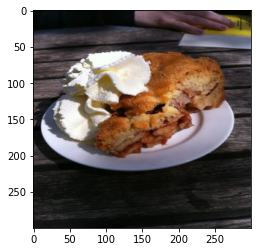

In [34]:
result = resize_and_rescale(ta)
_ = plt.imshow(result)

In [35]:
print("Min and max pixel values:", result.numpy().min(), result.numpy().max())


Min and max pixel values: 0.0 1.0


In [41]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.RandomRotation(0.2),
])


In [44]:
result_aug =  data_augmentation(result)

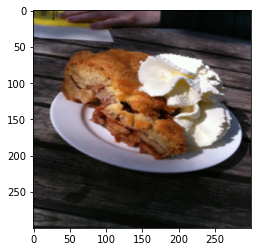

In [45]:
_ = plt.imshow(result_aug)

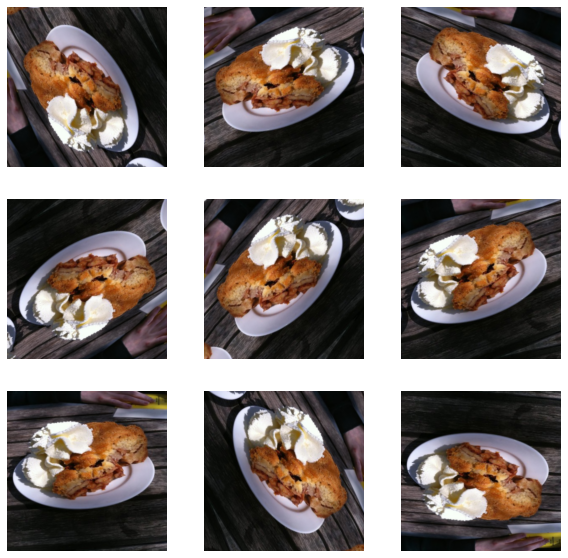

In [46]:
# Add the image to a batch.
image = tf.cast(tf.expand_dims(result, 0), tf.float32)

plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(image)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0])
  plt.axis("off")


In [ ]:
jkjjkjkkj